In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import folium
from folium.plugins import MarkerCluster
from datetime import datetime

In [153]:
nepal_df = pd.read_excel(r"E:\Atuda\67814-Data-Science-Final-Project\Data\Nepal\DATA.xlsx2018.xlsx")
senegal_df = pd.read_excel(r"E:\Atuda\67814-Data-Science-Final-Project\Data\Senegal\data.xlsx")

In [154]:
nepal_df = nepal_df.drop(['Result_Id', 'Device_Name', 'Incomplete', 'LocationStatus', 'ExtraInformation', 'Q3._Name_of_farmer',
                          'Q12._Who_makes_farming_decisions_in_this_holding_Me1', 'Q14._Did_you_participate_in_a_learning_program_abroad_for_exampl',
                          'type_of_crop_vegetables', 'Q59._A._for_surveyor_do_not_ask_farmerLook_in_the_field_does_the',
                          'Q61._A._for_surveyor_do_not_ask_farmerLook_in_the_field_does_the',
                          'Q66._A.For_surveyor_do_not_ask_farmerLook_in_the_field_does_the',
                          'Q77._for_surveyor_do_not_ask_farmerLook_in_the_field_Does_the_an',
                          'Q104._Why_do_you_want_to_have_this_number_of_childrendont_read_t', 'Q115._G.4._Please_take_a_picture_of_the_field_try_to_include_irr',
                          'hope_P', 'hope_A'], axis=1)
                            

In [155]:
nepal_df['Surveyed_Date'] = pd.to_datetime(nepal_df['Surveyed_Date'], errors='coerce')

In [158]:
create_datetime_col(nepal_df)

datetime64[ns]


In [159]:
create_datetime_col(senegal_df)

datetime64[ns]


In [23]:
nepal_df.describe()

,V1,Surveyed,Location_Latitude,Location_Longitude,Location_Altitude,Location_Accuracy,Latitude,Longitude,Altitude,Accuracy,...,ZQ101._how_many_people_live_in_this_household,ZDistance,ZCaste_bhramin,ZCaste_janjati,ZCaste_adhibasi,ZCaste_chettri,ZCaste_sanyasi,ZCaste_Dalit,ZCaste_Madhesi,ZCaste_Other
count,268.000000,268,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,...,2.680000e+02,2.680000e+02,2.680000e+02,2.680000e+02,2.680000e+02,2.680000e+02,2.680000e+02,2.680000e+02,2.680000e+02,2.680000e+02
mean,1.469776,2018-12-09 12:05:22.388059648,26.538175,88.054369,57.817164,11.368000,26.538111,88.054320,59.694030,10.780000,...,9.942296e-16,-1.033999e-15,-1.060512e-16,-9.279476e-17,-2.651279e-16,3.976918e-16,-1.193075e-16,7.953837e-17,-9.279476e-17,-9.942296e-18
min,1.200000,2018-11-06 00:00:00,26.438749,87.910339,-23.000000,3.216000,26.439294,87.910490,-118.000000,3.216000,...,-1.755735e+00,-8.496306e-01,-7.038121e-01,-4.363462e-01,-3.804694e-01,-4.363462e-01,-2.064990e-01,-1.750840e-01,-2.757182e-01,-1.965072e-01
25%,1.500000,2018-11-23 00:00:00,26.490667,88.064756,26.000000,6.432000,26.490409,88.064283,24.750000,6.432000,...,-1.031832e+00,-7.272489e-01,-7.038121e-01,-4.363462e-01,-3.804694e-01,-4.363462e-01,-2.064990e-01,-1.750840e-01,-2.757182e-01,-1.965072e-01
50%,1.500000,2018-12-06 00:00:00,26.540713,88.070583,34.000000,9.112000,26.540803,88.070687,38.000000,9.648001,...,-3.079289e-01,-2.163462e-01,-7.038121e-01,-4.363462e-01,-3.804694e-01,-4.363462e-01,-2.064990e-01,-1.750840e-01,-2.757182e-01,-1.965072e-01
75%,1.500000,2018-12-27 00:00:00,26.549377,88.075214,43.000000,15.008000,26.548702,88.075093,51.000000,13.936001,...,4.159741e-01,3.330641e-01,1.415532e+00,-4.363462e-01,-3.804694e-01,-4.363462e-01,-2.064990e-01,-1.750840e-01,-2.757182e-01,-1.965072e-01
max,1.500000,2019-01-11 00:00:00,26.884735,88.134979,1672.000000,40.736000,26.892103,88.133588,1636.000000,36.448002,...,6.931101e+00,5.252512e+00,1.415532e+00,2.283207e+00,2.618525e+00,2.283207e+00,4.824568e+00,5.690231e+00,3.613359e+00,5.069885e+00
std,0.072028,NaN,0.061078,0.047611,181.747016,6.884521,0.061371,0.047539,179.997866,6.141781,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [156]:

def create_datetime_col(df):
    # Convert both columns to strings and parse
    dt = pd.to_datetime(
        df['Surveyed_Date'].dt.strftime('%Y-%m-%d') + ' ' +
        df['Surveyed_Time'].astype(str)
    )
    df['Surveyed_DateTime'] = dt.dt.tz_localize(None)
    
    # Check
    print(df['Surveyed_DateTime'].dtype)
    # → datetime64[ns]


In [67]:

def lat_lon_mapper(df):
    # Filter out rows with missing coordinates (if any)
    df_map = df.dropna(subset=['Latitude', 'Longitude'])
    
    # Center area (approximate)
    center = [df_map['Latitude'].mean(), df_map['Longitude'].mean()]
    
    # Create a base map
    m = folium.Map(location=center, zoom_start=11, tiles='OpenStreetMap')
    
    # Add a marker cluster to group nearby points
    marker_cluster = MarkerCluster().add_to(m)
    
    # Plot each point
    for idx, row in df_map.iterrows():
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=f"Index: {idx}",  # You can customize with farmer ID, crop, etc.
            icon=folium.Icon(color='green', icon='leaf')
        ).add_to(marker_cluster)
    
    # Show map in Jupyter Notebook
    m


In [68]:
def analyze_numerical(df, col):
    print(f"\n--- {col.upper()} ---")
    print(df[col].describe())
    print("Missing values:", df[col].isnull().sum())

    # Histogram
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.tight_layout()
    plt.show()

    # Boxplot
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

In [139]:
def analyze_datetime(df, col):
    """
    Perform univariate analysis on a datetime64 column:
      - prints basic stats (min, max, missing)
      - plots counts per day, month, weekday, and hour-of-day
    """
    # Basic info
    series = df[col]
    if not series.dtype.name.startswith('datetime'):
        raise ValueError(f"Column {col!r} is not datetime dtype.")
    
    print(f"\n--- ANALYSIS OF {col.upper()} ---")
    print(f"Type: {series.dtype}")
    print(f"Missing: {series.isna().sum()} / {len(series)}")
    print(f"Range: {series.min()} → {series.max()}")
    
    # Extract time features
    df_temp = df.dropna(subset=[col]).copy()
    df_temp['date']    = df_temp[col].dt.date
    df_temp['month']   = df_temp[col].dt.to_period('M').astype(str)
    df_temp['weekday'] = df_temp[col].dt.day_name()
    df_temp['hour']    = df_temp[col].dt.hour
    
    # 1. Counts per day
    daily = df_temp.groupby('date').size()
    plt.figure()
    daily.plot(kind='bar')
    plt.title(f"Number of Records per Day ({col})")
    plt.xlabel("Date")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # 2. Counts by month
    monthly = df_temp.groupby('month').size().sort_index()
    plt.figure()
    monthly.plot(kind='bar')
    plt.title(f"Counts by Month ({col})")
    plt.xlabel("Month")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # 3. Counts by weekday
    # ensure Mon–Sun order
    weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    wd = df_temp['weekday'].value_counts().reindex(weekdays)
    plt.figure()
    wd.plot(kind='bar')
    plt.title(f"Counts by Weekday ({col})")
    plt.xlabel("Weekday")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
    
    # 4. Distribution of hour of day
    plt.figure()
    sns.histplot(df_temp['hour'], bins=24, discrete=True, kde=False)
    plt.title(f"Survey Time of Day Distribution ({col})")
    plt.xlabel("Hour of Day")
    plt.ylabel("Count")
    plt.xticks(range(0,24))
    plt.tight_layout()
    plt.show()

In [162]:
# consistent styling
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 4)

def analyze_duration(df, col):
    """
    Perform univariate analysis on a duration column in "HH:MM:SS" format:
      - converts to timedelta
      - prints missing count, range, mean, median, std, quartiles
      - plots histogram (in minutes) and boxplot of durations
    """
    # 1. Convert to timedelta
    if not pd.api.types.is_timedelta64_dtype(df[col]):
        durations = pd.to_timedelta(df[col], errors='coerce')
    else:
        durations = df[col]
    
    # 2. Basic stats
    total = len(durations)
    missing = durations.isna().sum()
    valid = total - missing
    
    print(f"\n--- ANALYSIS OF {col!r} ---")
    print(f"Total entries: {total}")
    print(f"Missing / invalid: {missing}")
    print(f"Valid durations : {valid}")
    
    if valid == 0:
        print("No valid durations to analyze.")
        return
    
    # describe as timedeltas
    print(f"Range   : {durations.min()} → {durations.max()}")
    print(f"Mean    : {durations.mean()}")
    print(f"Median  : {durations.median()}")
    print(f"Std Dev : {durations.std()}")
    print("Quartiles:")
    for q in [0.25, 0.5, 0.75]:
        print(f"  {int(q*100)}th pct: {durations.quantile(q)}")
    
    # 3. Convert to numeric (minutes) for plotting
    minutes = durations.dt.total_seconds() / 60
    
    # 4. Histogram of durations (minutes)
    plt.figure()
    sns.histplot(minutes.dropna(), bins=30, kde=True)
    plt.title(f"Distribution of {col} (minutes)")
    plt.xlabel("Duration (minutes)")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
    
    # 5. Boxplot of durations (minutes)
    plt.figure()
    sns.boxplot(x=minutes.dropna())
    plt.title(f"Boxplot of {col} (minutes)")
    plt.xlabel("Duration (minutes)")
    plt.tight_layout()
    plt.show()


--- ANALYSIS OF SURVEYED_DATETIME ---
Type: datetime64[ns]
Missing: 0 / 335
Range: 2018-03-27 09:28:42 → 2018-05-02 13:15:37


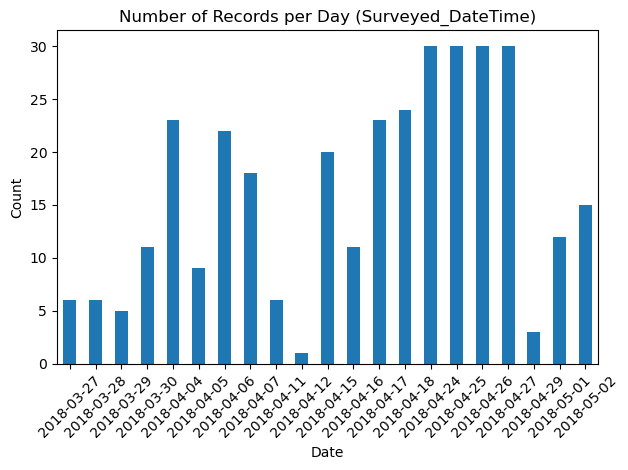

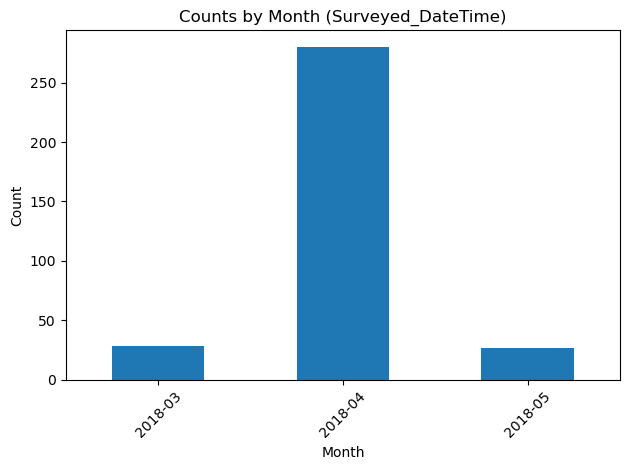

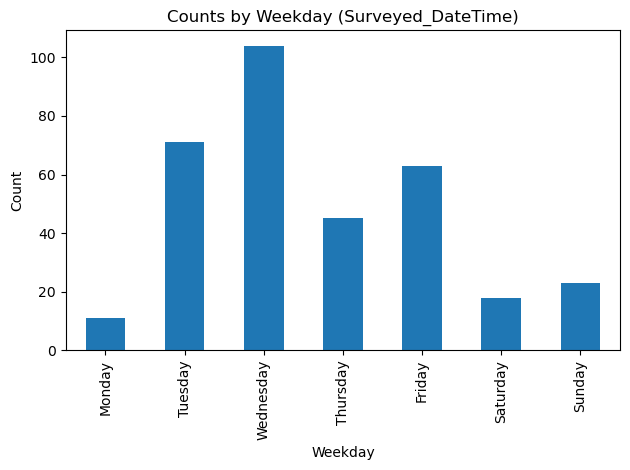

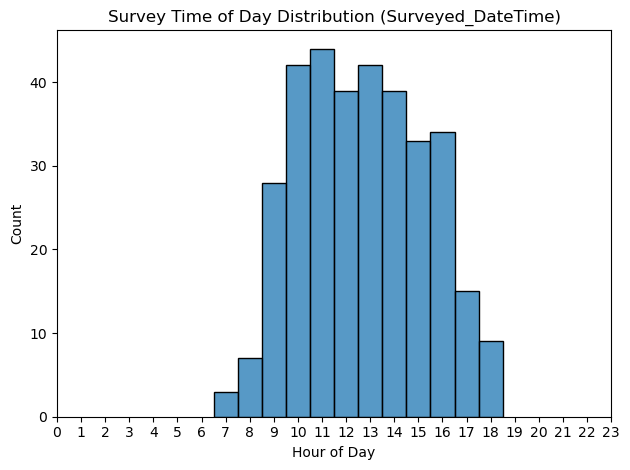

In [160]:
analyze_datetime(senegal_df, 'Surveyed_DateTime')

In [163]:
analyze_duration(nepal_df, 'how_long_was_the_survey')

TypeError: Invalid type for timedelta scalar: <class 'datetime.time'>